<a href="https://colab.research.google.com/github/nxshi/IDS131F21/blob/main/MarchMadness/Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/Colab Notebooks/
DATADIR = os.path.join('/content/gdrive/MyDrive/IDS131 Project')
os.chdir(DATADIR)

import pandas as pd
sub = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/submissions_2019_decorated.csv')
com = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/comments_2019_decorated.csv')
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
com['created_utc'] = com['created_utc'].str.slice(0,10)
sub['created_utc'] = sub['created_utc'].str.slice(0,10)
com = com.append(sub)
com = com.reset_index(drop=True)

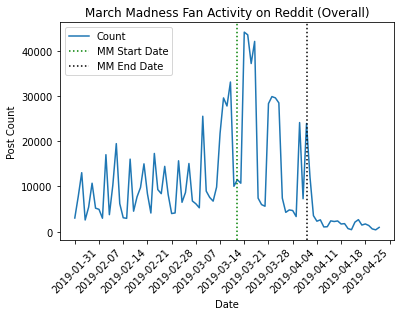

In [ ]:
myLocator = mticker.MultipleLocator(7)
s = com['created_utc'].value_counts().sort_index()
#alternative  
#s = df.groupby('date').size()
fig, ax = plt.subplots()
ax.plot(s, label = 'Count')
plt.xlabel('Date')
start = '2019-03-19'
end = '2019-04-08'
plt.axvline(start, linestyle = 'dotted', color = 'green',label = 'MM Start Date')
plt.axvline(end, linestyle = 'dotted', color = 'black', label = 'MM End Date')
plt.xticks(rotation = 45)
ax.xaxis.set_major_locator(myLocator)
plt.legend()
plt.title('March Madness Fan Activity on Reddit (Overall)')
plt.ylabel('Post Count')
plt.savefig('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments+Posts_df+plt/comments_all.png')

In [ ]:
teams = com['Team Name'].unique()
teams = teams.tolist()

In [ ]:
'''for i in range(len(teams)):
  temp = teams[i].split(' / ')
  teams[i] = temp[0]
  if len(temp) == 2:
    teams.append(temp[1])'''

"for i in range(len(teams)):\n  temp = teams[i].split(' / ')\n  teams[i] = temp[0]\n  if len(temp) == 2:\n    teams.append(temp[1])"

In [ ]:
'''team = []
for x in teams:
    if x not in team:
        team.append(x)'''

'team = []\nfor x in teams:\n    if x not in team:\n        team.append(x)'

In [ ]:
Tally = [0] * len(teams)
Elim_Date = ['0'] * len(teams)
d = {'Teams' : teams, 'Tally': Tally, 'Elim_Date': Elim_Date}
tarray = pd.DataFrame(data = d)

In [ ]:
com['created_utc'].min()

'2019-01-31'

In [ ]:
com['created_utc'].max()

'2019-04-29'

In [ ]:
tarray

,Teams,Tally,Elim_Date
0,Kentucky,0,0
1,Kansas,0,0
2,Virginia Tech,0,0
3,VCU,0,0
4,Texas Tech,0,0
...,...,...,...
62,Abilene Christian,0,0
63,St. Johns,0,0
64,Gardner-Webb,0,0
65,Fairleigh Dickinson,0,0


In [ ]:
for i in range(len(tarray)):
    tarray.at[i, 'Tally'] = (com['Team Name'] == tarray.at[i,'Teams']).sum() 
    '''+ len(com[com['author_flair_text'].str.contains(str(tarray.at[i,'Team']))])/2 + len(com[com['author_flair_text'].str.contains(str(tarray.at[i,'Team'])+' /')])/2'''
    temporary = com[com['Team Name'] == tarray.at[i,'Teams']] 
    tarray.at[i, 'Elim_Date'] = temporary.loc[min(temporary.index),'Date of Elimination Round']

tarray elimination date was searched by unique values for user flairs. the largest value for a pair of user flairs was only 2562, so we decided to ignore these as these teams are not within the top  March Madnessteams that we will be analyzing.

In [ ]:
tarray = tarray.sort_values(by = 'Tally', ascending = False)

In [ ]:
tarray = tarray.reset_index(drop=True)

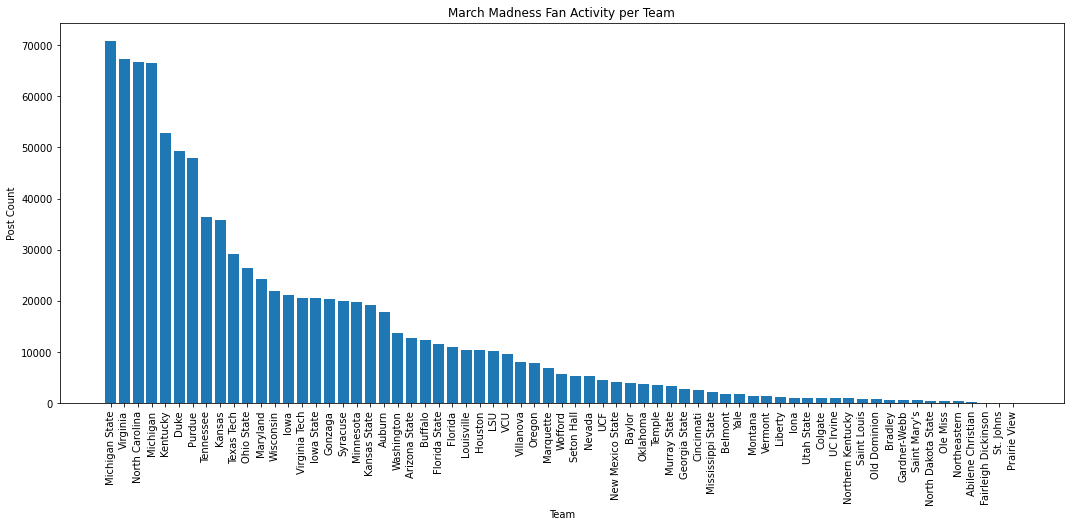

In [ ]:
x = tarray['Teams']
y = tarray['Tally']
fig, ax = plt.subplots(figsize=(18,7))
plt.bar(x,y)
plt.xticks(rotation = 90) 
plt.xlabel('Team')
plt.ylabel('Post Count')
plt.title('March Madness Fan Activity per Team')
plt.savefig('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments+Posts_df+plt/teamtally_all.png')

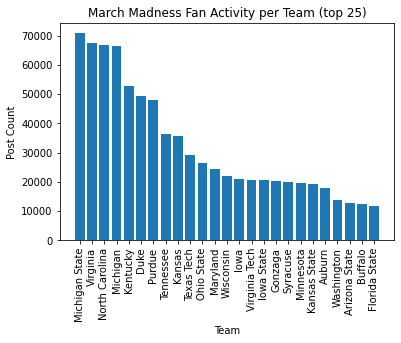

In [ ]:
plt.bar(x[0:25],y[0:25])
plt.xticks(rotation = 90) 
plt.xlabel('Team')
plt.ylabel('Post Count')
plt.title('March Madness Fan Activity per Team (top 25)')
plt.savefig('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments+Posts_df+plt/teamtally_25.png')

Select teams up to the one that has ~10% tally of comments/posts in comparison to last team

In [ ]:
tarray.to_csv('/content/gdrive/MyDrive/IDS131 Project/Cleaned Data/2019-teams-unique.csv', index=False) 

FileNotFoundError: ignored

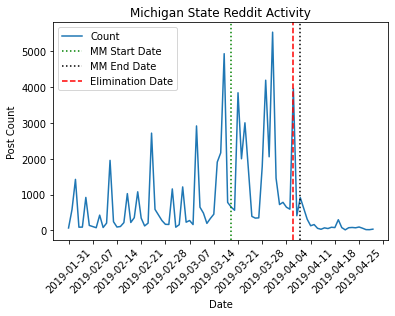

<Figure size 432x288 with 0 Axes>

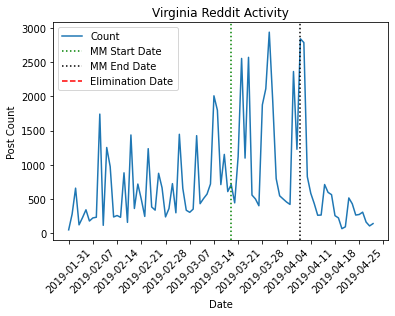

<Figure size 432x288 with 0 Axes>

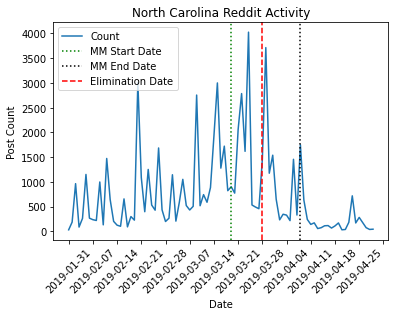

<Figure size 432x288 with 0 Axes>

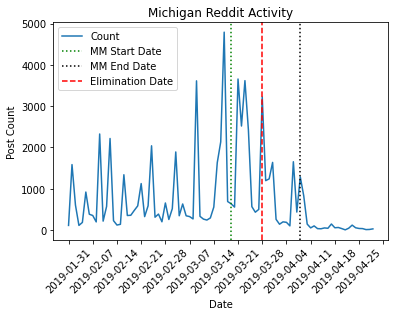

<Figure size 432x288 with 0 Axes>

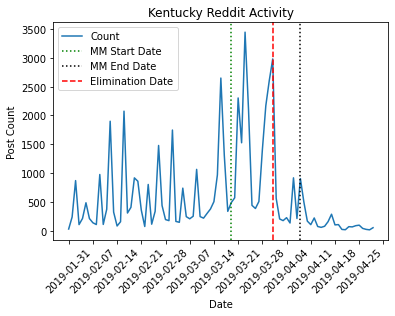

<Figure size 432x288 with 0 Axes>

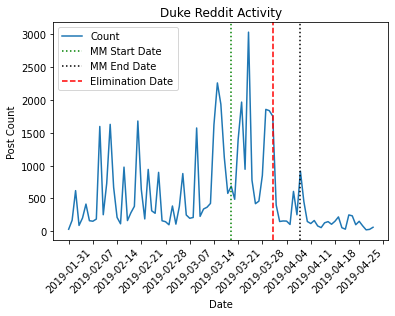

<Figure size 432x288 with 0 Axes>

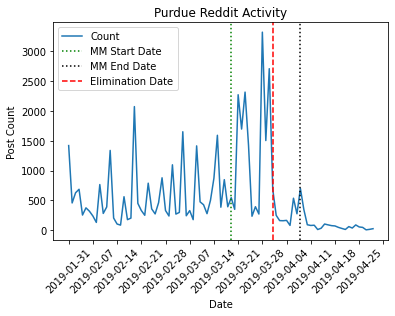

<Figure size 432x288 with 0 Axes>

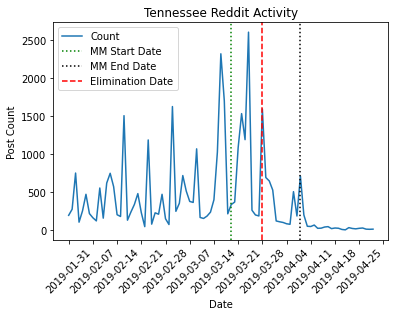

<Figure size 432x288 with 0 Axes>

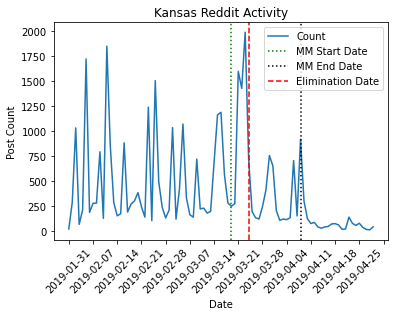

<Figure size 432x288 with 0 Axes>

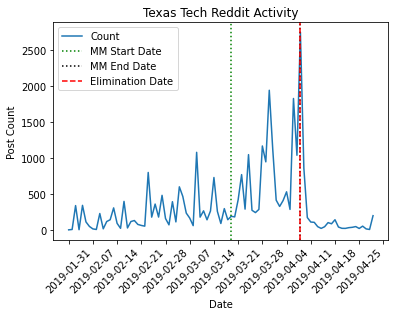

<Figure size 432x288 with 0 Axes>

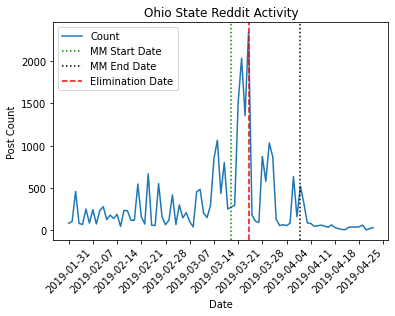

<Figure size 432x288 with 0 Axes>

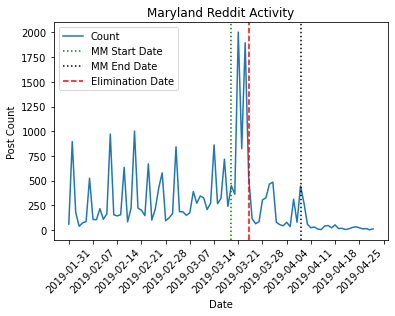

<Figure size 432x288 with 0 Axes>

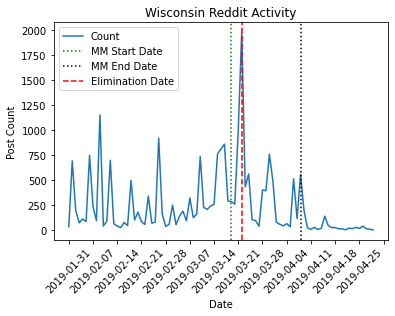

<Figure size 432x288 with 0 Axes>

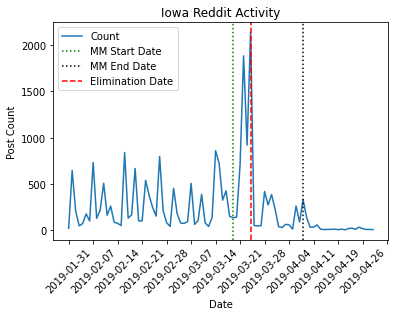

<Figure size 432x288 with 0 Axes>

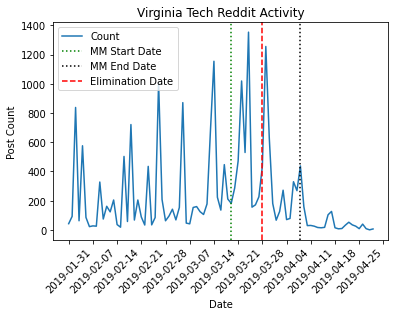

<Figure size 432x288 with 0 Axes>

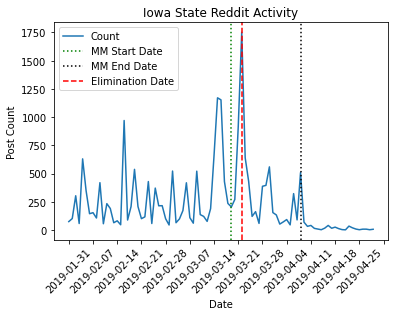

<Figure size 432x288 with 0 Axes>

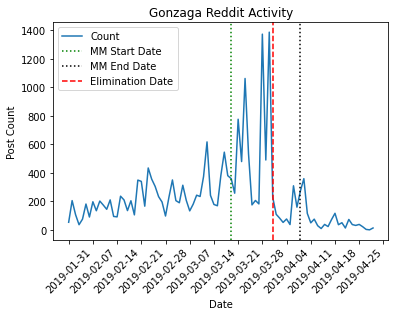

<Figure size 432x288 with 0 Axes>

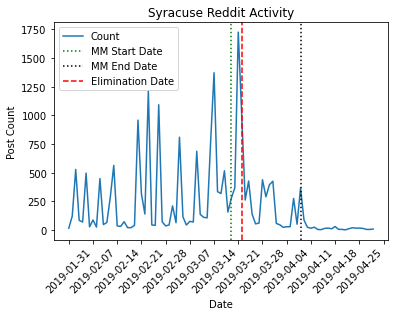

<Figure size 432x288 with 0 Axes>

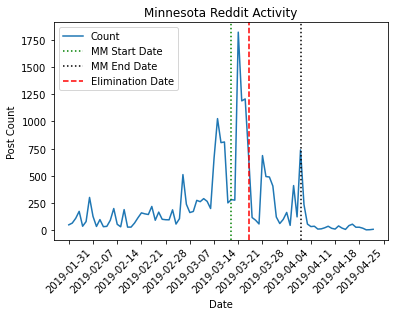

<Figure size 432x288 with 0 Axes>

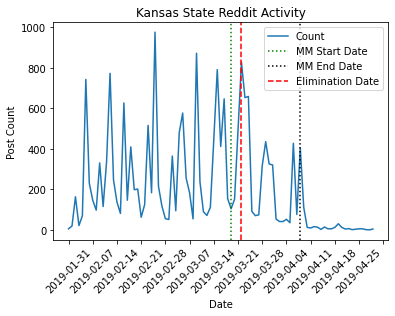

<Figure size 432x288 with 0 Axes>

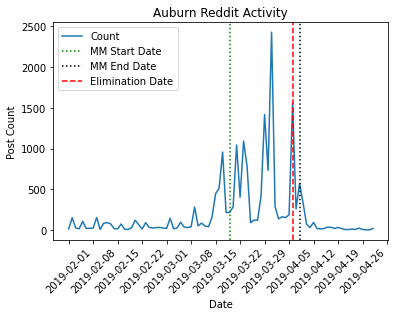

<Figure size 432x288 with 0 Axes>

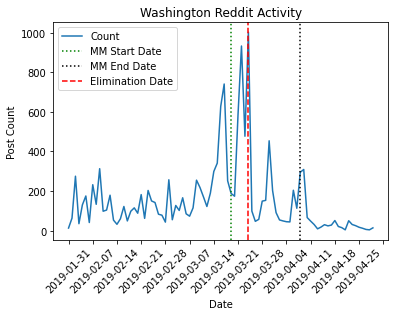

<Figure size 432x288 with 0 Axes>

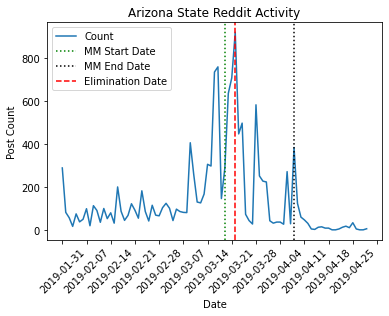

<Figure size 432x288 with 0 Axes>

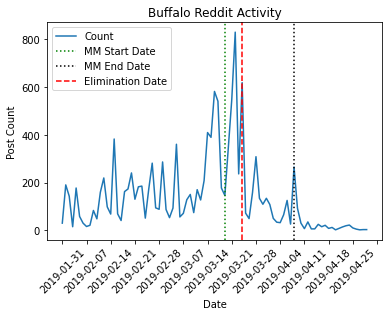

<Figure size 432x288 with 0 Axes>

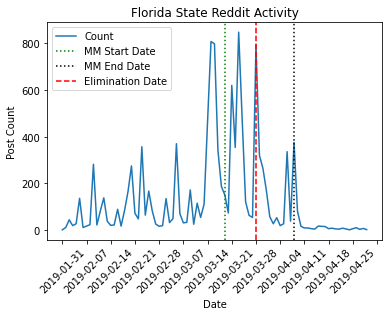

<Figure size 432x288 with 0 Axes>

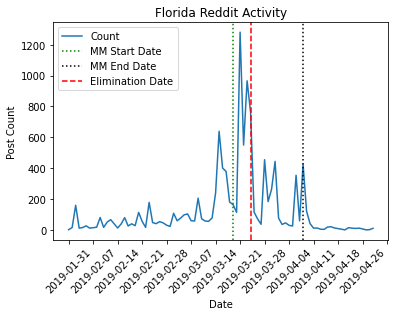

<Figure size 432x288 with 0 Axes>

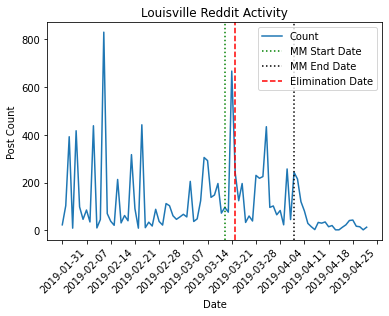

<Figure size 432x288 with 0 Axes>

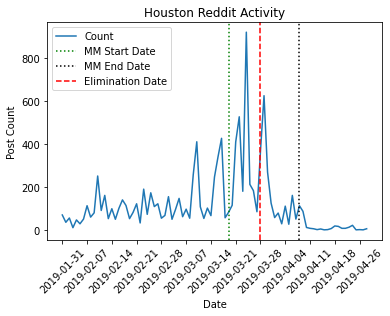

<Figure size 432x288 with 0 Axes>

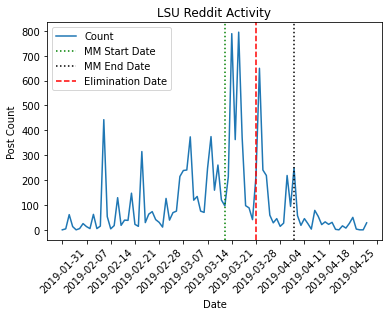

<Figure size 432x288 with 0 Axes>

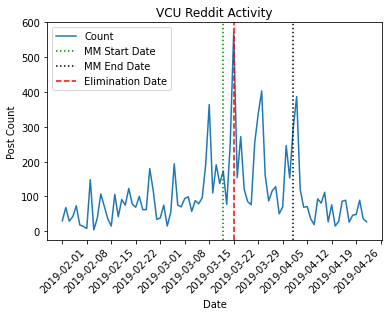

<Figure size 432x288 with 0 Axes>

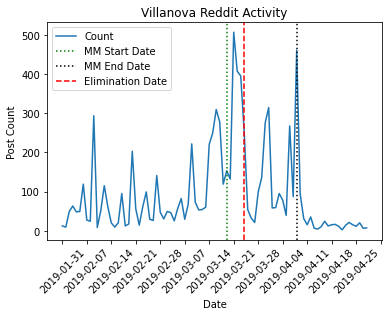

<Figure size 432x288 with 0 Axes>

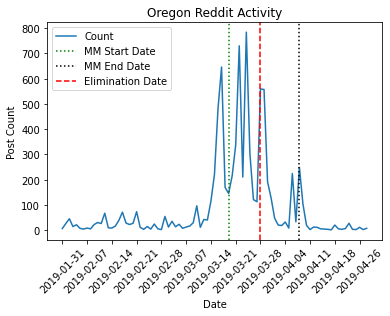

<Figure size 432x288 with 0 Axes>

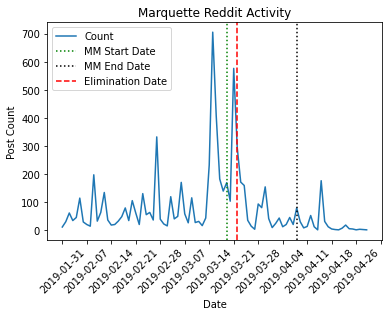

<Figure size 432x288 with 0 Axes>

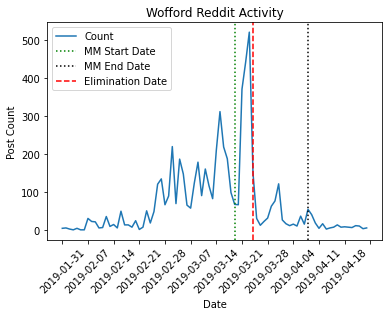

<Figure size 432x288 with 0 Axes>

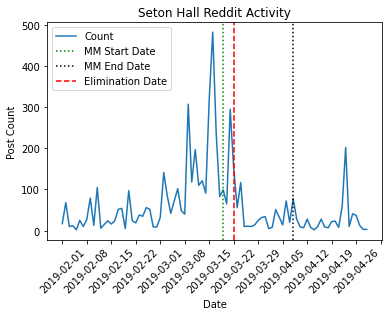

<Figure size 432x288 with 0 Axes>

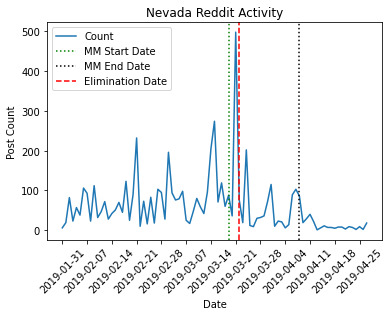

<Figure size 432x288 with 0 Axes>

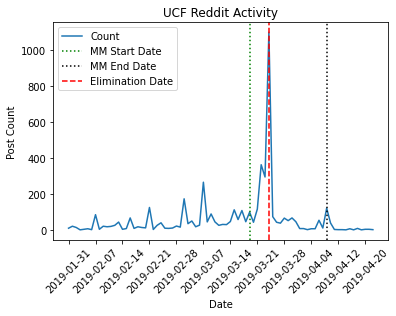

<Figure size 432x288 with 0 Axes>

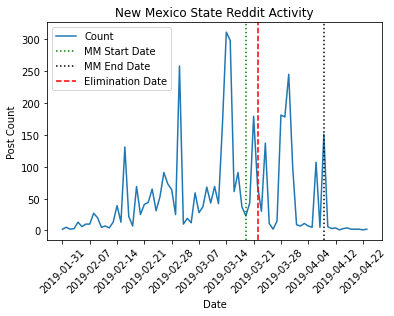

<Figure size 432x288 with 0 Axes>

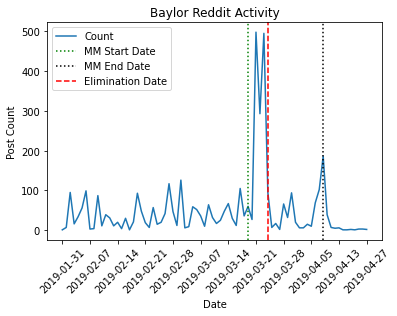

<Figure size 432x288 with 0 Axes>

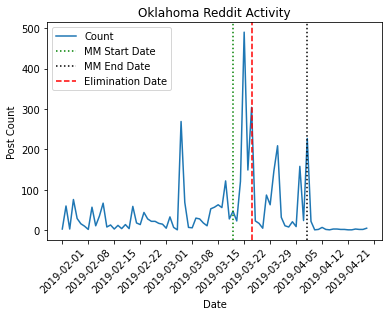

<Figure size 432x288 with 0 Axes>

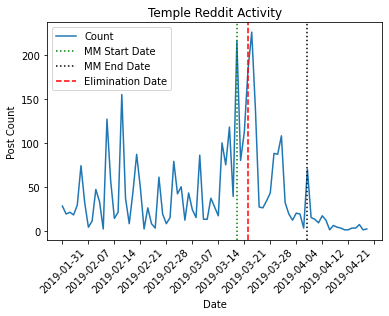

<Figure size 432x288 with 0 Axes>

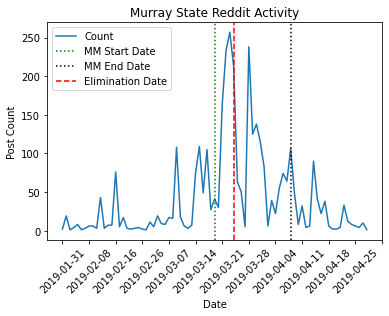

<Figure size 432x288 with 0 Axes>

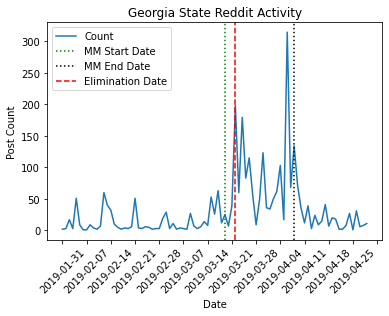

<Figure size 432x288 with 0 Axes>

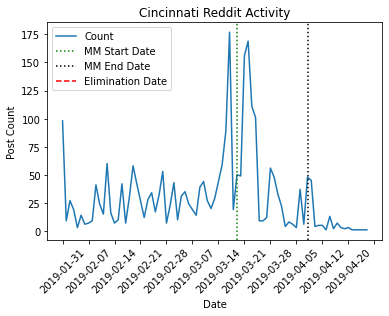

<Figure size 432x288 with 0 Axes>

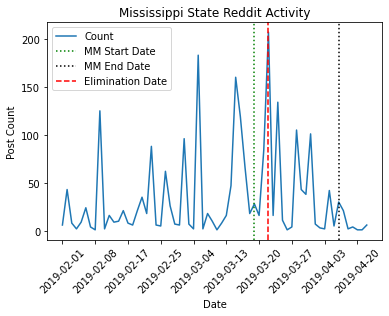

<Figure size 432x288 with 0 Axes>

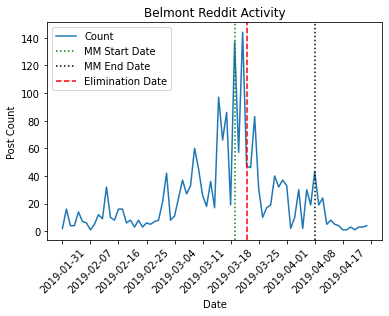

<Figure size 432x288 with 0 Axes>

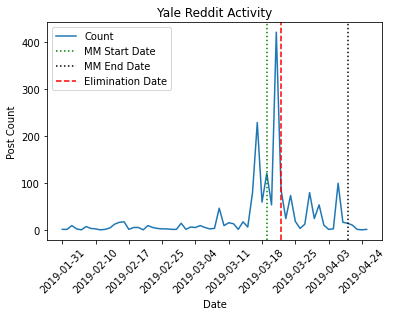

<Figure size 432x288 with 0 Axes>

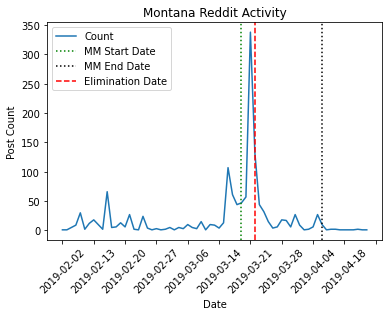

<Figure size 432x288 with 0 Axes>

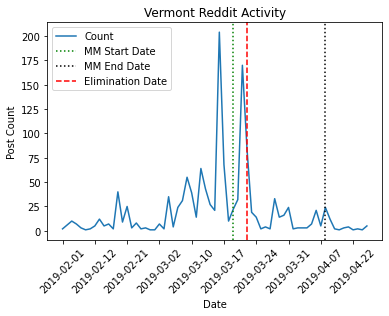

<Figure size 432x288 with 0 Axes>

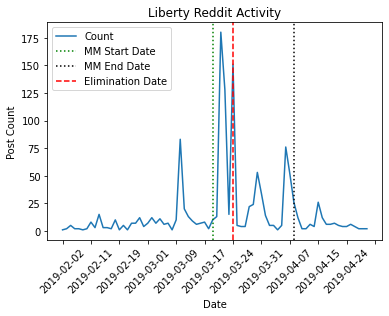

<Figure size 432x288 with 0 Axes>

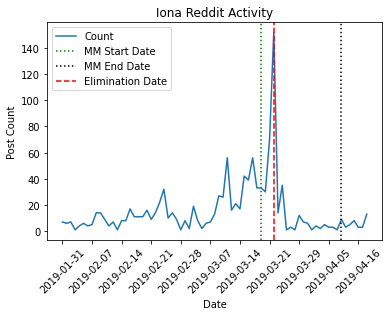

<Figure size 432x288 with 0 Axes>

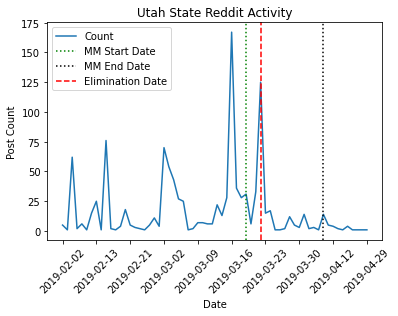

<Figure size 432x288 with 0 Axes>

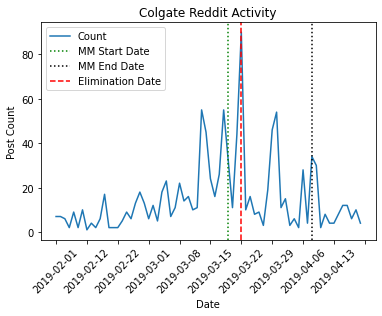

<Figure size 432x288 with 0 Axes>

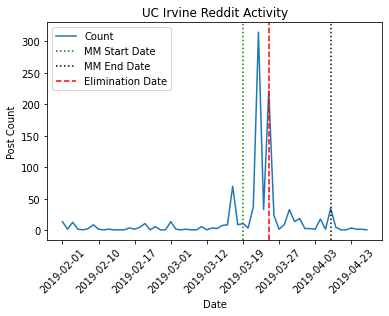

<Figure size 432x288 with 0 Axes>

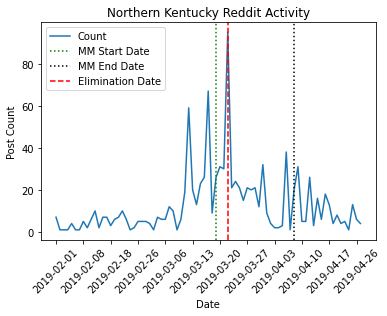

<Figure size 432x288 with 0 Axes>

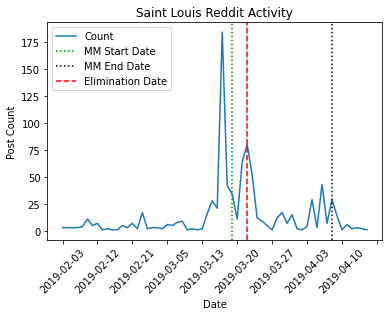

<Figure size 432x288 with 0 Axes>

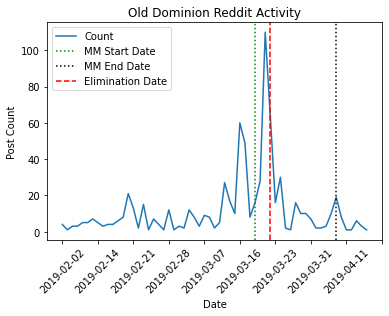

<Figure size 432x288 with 0 Axes>

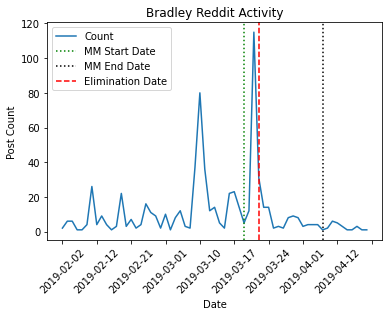

<Figure size 432x288 with 0 Axes>

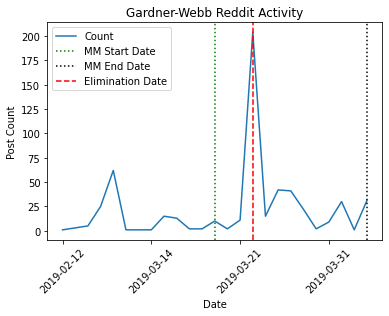

<Figure size 432x288 with 0 Axes>

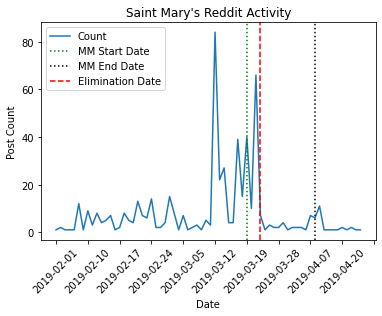

<Figure size 432x288 with 0 Axes>

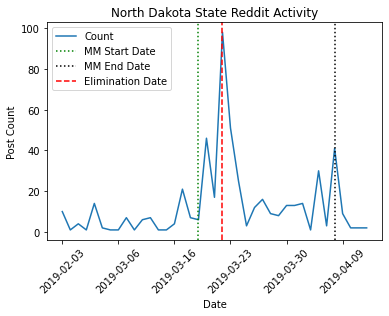

<Figure size 432x288 with 0 Axes>

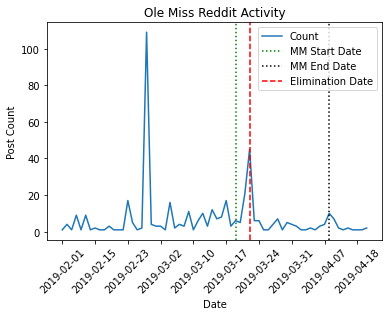

<Figure size 432x288 with 0 Axes>

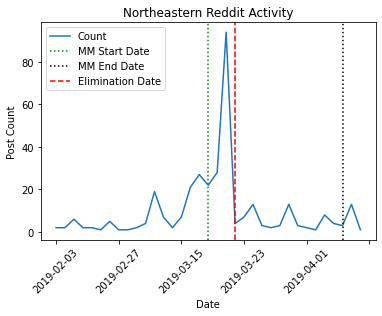

<Figure size 432x288 with 0 Axes>

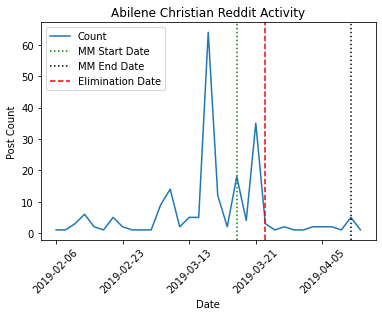

<Figure size 432x288 with 0 Axes>

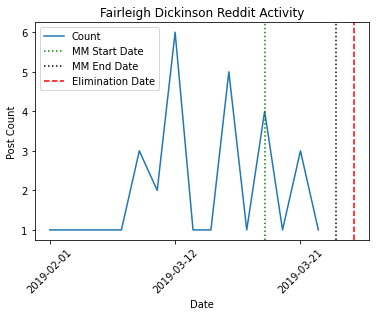

<Figure size 432x288 with 0 Axes>

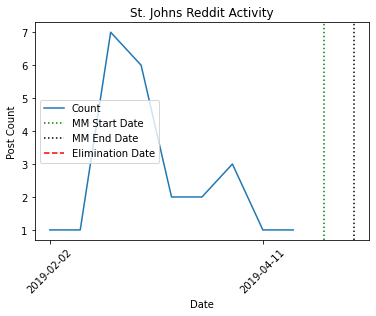

<Figure size 432x288 with 0 Axes>

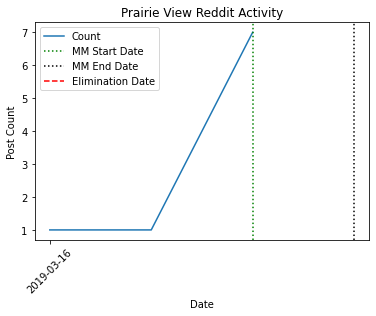

<Figure size 432x288 with 0 Axes>

In [ ]:
myLocator = mticker.MultipleLocator(7)
for i in range(len(tarray)):
  arr = com.loc[com['Team Name'] == tarray.at[i,'Teams']]
  #arr = com[com['Team Name'].str.contains(str(tarray.at[i,'Teams']))] ## ARRAY OF EQUAL COLUMNS
  arr = arr.reset_index(drop=True)
  arr.to_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments+Posts_df+plt/'+str(tarray.at[i,'Teams'])+'.csv', index=False)
  t = arr['created_utc'].value_counts().sort_index()
  fig, ax = plt.subplots()
  ax.plot(t, label = 'Count')
  x = tarray.at[i,'Elim_Date']
  plt.axvline(start, linestyle = 'dashed', color = 'green',label = 'MM Start Date')
  plt.axvline(end, linestyle = 'dashed', color = 'black', label = 'MM End Date')
  plt.axvline(x, color = 'red', linestyle = 'dashed', label = 'Elimination Date')
  plt.title(str(tarray.at[i,'Teams'])+' Reddit Activity')
  plt.xticks(rotation = 45)
  ax.xaxis.set_major_locator(myLocator)
  plt.xlabel('Date')
  plt.ylabel('Post Count')
  plt.legend()
  plt.show()
  plt.savefig('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments+Posts_df+plt/'+str(tarray.at[i,'Teams'])+'.png')

posts/comments reach its peak then dramatically decrease after team's loss - some remain active afterwards and comment on other games, a portion reemerge for the final